In [267]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
import pytz

from astroplan.plots import plot_sky, plot_airmass
from astroplan import Observer, FixedTarget, time_grid_from_range, observability_table, moon_illumination
from astroplan import AirmassConstraint, MoonSeparationConstraint

In [76]:
apache = Observer(longitude = 105.8202778 * u.deg,
                    latitude = 32.78027778 * u.deg,
                    timezone = 'US/Mountain',
                    name = 'Apache Point')
#astropy.coordinates.EarthLocation.get_site()

# TARGETS

In [32]:
#from astroquery.ned import Ned
#result_table = Ned.query_refcode('2013ApJ...772...82H ')
#print(result_table)

ModuleNotFoundError: No module named 'astroquery'

In [91]:
target_table = pd.read_csv('./globs2.csv')
table_values = target_table.as_matrix()
table_values
targets = [FixedTarget(coord=SkyCoord(ra = ra*u.hourangle, dec = dec*u.deg), name=name)
            for name, ra, dec in table_values]
#target = [FixedTarget(coord=SkyCoord(ra = 0.712313889*u.hourangle, dec = 41.26875*u.deg), name='M31')]
#         for Name, RA, DEC in table_values]

In [92]:
targets

[<FixedTarget "NGC 2915" at SkyCoord (ICRS): (ra, dec) in deg ( 141.54795, -76.62639)>,
 <FixedTarget "SMC" at SkyCoord (ICRS): (ra, dec) in deg ( 13.1583, -72.8002)>,
 <FixedTarget "NGC 406" at SkyCoord (ICRS): (ra, dec) in deg ( 16.85265, -69.87742)>,
 <FixedTarget "LMC" at SkyCoord (ICRS): (ra, dec) in deg ( 80.8941, -69.7561)>,
 <FixedTarget "NGC 2434" at SkyCoord (ICRS): (ra, dec) in deg ( 113.71335, -69.28421)>,
 <FixedTarget "ESO 059-01" at SkyCoord (ICRS): (ra, dec) in deg ( 112.82685, -68.18753)>,
 <FixedTarget "IC 5176" at SkyCoord (ICRS): (ra, dec) in deg ( 333.7326, -66.84939)>,
 <FixedTarget "NGC 1313" at SkyCoord (ICRS): (ra, dec) in deg ( 49.56495, -66.49759)>,
 <FixedTarget "PGC 6240" at SkyCoord (ICRS): (ra, dec) in deg ( 25.37865, -65.61599)>,
 <FixedTarget "NGC 2082" at SkyCoord (ICRS): (ra, dec) in deg ( 85.46295, -64.30108)>,
 <FixedTarget "ESO 137-18" at SkyCoord (ICRS): (ra, dec) in deg ( 245.2464, -60.48759)>,
 <FixedTarget "ESO 118-034" at SkyCoord (ICRS): (ra,

In [93]:
reference_time = Time("2018-3-31 12:00:00")
end_time = Time("2018-04-01 12:00:00")

twilight_apache = apache.twilight_evening_astronomical(reference_time, which='nearest')
twilight_end_apache = apache.twilight_morning_astronomical(reference_time, which='next')
apache_observing_length = (twilight_end_apache - twilight_apache).to(u.h)
apache_observing_length

<Quantity 8.71007925644517 h>

In [94]:
reference12_time = Time("2018-12-31 12:00:00")
end12_time = Time("2019-01-01 12:00:00")

window_range = [reference12_time, end12_time]
window_time_grid = time_grid_from_range(window_range)

twilight_12apache = apache.twilight_evening_astronomical(reference12_time, which='nearest')
twilight_end_12apache = apache.twilight_morning_astronomical(reference12_time, which='next')
apache_12observing_length = (twilight_end_12apache - twilight_12apache).to(u.h)
print(apache_12observing_length)

apache.moon_phase(reference12_time) #phase = 2*pi is new moon. phase = 0 is full

11.044439010322096 h


<Quantity 2.0217873668494173 rad>

In [95]:
apache_observing_range = [twilight_12apache, twilight_end_12apache]
apache_observing_range
print(apache_observing_range[0])

2458483.9780593943


In [96]:
constraints = [AirmassConstraint(2), MoonSeparationConstraint(35*u.deg)]

apache_observing_table = observability_table(constraints, apache, target, time_range=apache_observing_range)

print(apache_observing_table) #Passes moon separation constraint. 

NameError: name 'target' is not defined

In [ ]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

fig.tight_layout()

print(twilight_12apache.datetime)
print(twilight_end_12apache.datetime)

for i, my_object in enumerate(target):

    if apache_observing_table['ever observable'][i]:  # Sees true or false
        ax = plot_airmass(my_object, apache, window_time_grid, max_airmass=2.0)
        name = apache_observing_table['target name'][i]
        obj_frac = apache_observing_table['fraction of time observable'][i]
        obj_time = obj_frac * apache_observing_length
        output = "You can observe {0:s} for {1:.2f}".format(name, obj_time.to(u.h))
        print(output)

ax.vlines(twilight_12apache.datetime, 1,3, color='r', linewidth=5)
ax.vlines(twilight_end_12apache.datetime, 1,3, color='r', linewidth=5)

ax.legend(loc=0,shadow=True);

# Planetary Nebula

In [97]:
ctio = Observer(longitude = 70.804 * u.deg,
                    latitude = -30.169 * u.deg,
                    timezone = 'Etc/GMT+3',
                    name = 'CTIO')

In [98]:
ic418 = [FixedTarget(coord=SkyCoord(ra = 5.45783436*u.hourangle, dec = -12.68811111*u.deg), name='IC 418')]

In [99]:
ctioreference_time = Time("2018-03-31 12:00:00")
ctioend_time = Time("2018-04-01 12:00:00")

twilight_ctio = ctio.twilight_evening_astronomical(ctioreference_time, which='nearest')
twilight_end_ctio = ctio.twilight_morning_astronomical(ctioreference_time, which='next')
ctio_observing_length = (twilight_end_ctio - twilight_ctio).to(u.h)
ctio_observing_length

<Quantity 9.557093549519777 h>

In [100]:
ctioreference12_time = Time("2018-12-31 12:00:00")
ctioend12_time = Time("2019-01-01 12:00:00")

window_range = [ctioreference12_time, ctioend12_time]
window_time_grid = time_grid_from_range(window_range)

twilight_12ctio = apache.twilight_evening_astronomical(ctioreference12_time, which='nearest')
twilight_end_12ctio = apache.twilight_morning_astronomical(ctioreference12_time, which='next')
ctio_12observing_length = (twilight_end_12ctio - twilight_12ctio).to(u.h)
print(ctio_12observing_length)

ctio.moon_phase(ctioreference12_time) #phase = 2*pi is new moon. phase = 0 is full

11.044439010322096 h


<Quantity 2.0217873668494173 rad>

In [101]:
ctio_observing_range = [twilight_12ctio, twilight_end_12ctio]
ctio_observing_range
print(ctio_observing_range[0])

2458483.9780593943


In [102]:
constraints = [AirmassConstraint(2), MoonSeparationConstraint(35*u.deg)]

ctio_observing_table = observability_table(constraints, ctio, ic418, time_range=apache_observing_range)

print(ctio_observing_table) #Passes moon separation constraint. 

target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
     IC 418            True             False              0.739130434783


2018-12-31 11:28:24.331666
2018-12-31 22:31:04.312103
You can observe IC 418 for 7.06 h


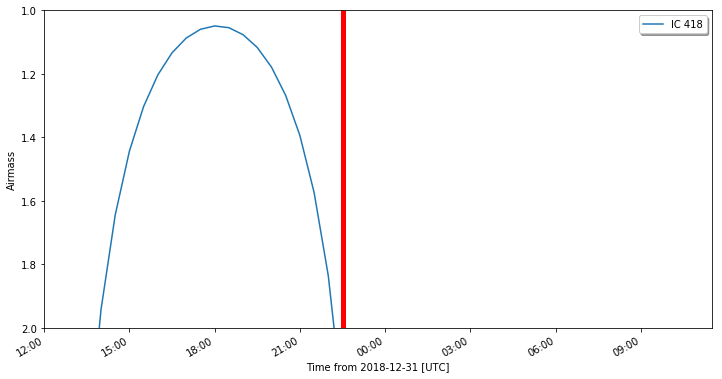

In [103]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

fig.tight_layout()

print(twilight_12ctio.datetime)
print(twilight_end_12ctio.datetime)

for i, my_object in enumerate(ic418):

    if ctio_observing_table['ever observable'][i]:  # Sees true or false
        ax = plot_airmass(my_object, ctio, window_time_grid, max_airmass=2.0)
        name = ctio_observing_table['target name'][i]
        obj_frac = ctio_observing_table['fraction of time observable'][i]
        obj_time = obj_frac * ctio_observing_length
        output = "You can observe {0:s} for {1:.2f}".format(name, obj_time.to(u.h))
        print(output)

ax.vlines(twilight_12ctio.datetime, 1,3, color='r', linewidth=5)
ax.vlines(twilight_end_12ctio.datetime, 1,3, color='r', linewidth=5)

ax.legend(loc=0,shadow=True);

# La Silla Globular Clusters

In [104]:
target_table = pd.read_csv('./globs2.csv')
table_values = target_table.as_matrix()
table_values
globs = [FixedTarget(coord=SkyCoord(ra = ra*u.hourangle, dec = dec*u.deg), name=name)
            for name, ra, dec in table_values]

In [105]:
lasilla = Observer(longitude = -29.25 * u.deg,
                    latitude = 70.7333 * u.deg,
                    timezone = 'Etc/GMT+3',
                    name = 'Apache Point')

In [234]:
reference_time = Time("2018-10-15 12:00:00")
end_time = Time("2018-10-31 12:00:00")

window_range = [reference_time, end_time]
window_time_grid = time_grid_from_range(window_range)

twilight_lasilla = lasilla.twilight_evening_astronomical(reference_time, which='nearest')
twilight_end_lasilla = lasilla.twilight_morning_astronomical(reference_time, which='next')
lasilla_observing_length = (twilight_end_lasilla - twilight_lasilla).to(u.h)
lasilla_observing_length

lasilla.moon_phase(reference_time) #phase = 2*pi is new moon. phase = 0 is full

lasilla_observing_range = [twilight_lasilla, twilight_end_lasilla]
lasilla_observing_range
print(lasilla_observing_range)

constraints = [AirmassConstraint(2), MoonSeparationConstraint(35*u.deg)]

lasilla_observing_table = observability_table(constraints, lasilla, globs, time_range=lasilla_observing_range)

print(lasilla_observing_table) #Passes moon separation constraint. 

[<Time object: scale='utc' format='jd' value=2458407.4059906155>, <Time object: scale='utc' format='jd' value=2458407.737698787>]
target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
   NGC 2915           False             False                         0.0
        SMC           False             False                         0.0
    NGC 406           False             False                         0.0
        LMC           False             False                         0.0
   NGC 2434           False             False                         0.0
 ESO 059-01           False             False                         0.0
    IC 5176           False             False                         0.0
   NGC 1313           False             False                         0.0
   PGC 6240           False             False                         0.0
   NGC 2082           False             False           

In [206]:
print(lasilla_observing_range)
        
#observe_time = reference_time + np.linspace(0, 336, 24)*u.hour
delta_t = end_time - reference_time
observe_time = reference_time + delta_t*np.linspace(0, 1, 75)

[<Time object: scale='utc' format='jd' value=2458407.4059906155>, <Time object: scale='utc' format='jd' value=2458407.737698787>]


In [243]:
globs[0].name
newlist = sorted(globs, key=lambda x: x.name, reverse=False)
some_globs = newlist[0:20]
some_globs

[<FixedTarget "A1644 1" at SkyCoord (ICRS): (ra, dec) in deg ( 194.2983, -17.40944)>,
 <FixedTarget "A1689 BCG" at SkyCoord (ICRS): (ra, dec) in deg ( 197.87295, -1.33806)>,
 <FixedTarget "A2124 1" at SkyCoord (ICRS): (ra, dec) in deg ( 236.2458,  36.10944)>,
 <FixedTarget "A2147 1" at SkyCoord (ICRS): (ra, dec) in deg ( 240.5709,  15.97472)>,
 <FixedTarget "A2152 1" at SkyCoord (ICRS): (ra, dec) in deg ( 241.3716,  16.43583)>,
 <FixedTarget "A2152 2" at SkyCoord (ICRS): (ra, dec) in deg ( 241.36005,  16.44278)>,
 <FixedTarget "A754 1" at SkyCoord (ICRS): (ra, dec) in deg ( 137.13495, -9.63)>,
 <FixedTarget "A754 2" at SkyCoord (ICRS): (ra, dec) in deg ( 137.1621, -9.62525)>,
 <FixedTarget "CGCG 065-015" at SkyCoord (ICRS): (ra, dec) in deg ( 155.84895,  12.83507)>,
 <FixedTarget "CGCG 421-019" at SkyCoord (ICRS): (ra, dec) in deg ( 79.22985,  6.55247)>,
 <FixedTarget "DDO 52" at SkyCoord (ICRS): (ra, dec) in deg ( 127.11855,  41.85661)>,
 <FixedTarget "ESO 059-01" at SkyCoord (ICRS): 

In [244]:
small_lasilla_observing_table = observability_table(constraints, lasilla, some_globs, time_range=lasilla_observing_range)
print(small_lasilla_observing_table)

 target name  ever observable always observable fraction of time observable
------------- --------------- ----------------- ---------------------------
      A1644 1           False             False                         0.0
    A1689 BCG           False             False                         0.0
      A2124 1            True             False                      0.1875
      A2147 1           False             False                         0.0
      A2152 1           False             False                         0.0
      A2152 2           False             False                         0.0
       A754 1           False             False                         0.0
       A754 2           False             False                         0.0
 CGCG 065-015           False             False                         0.0
 CGCG 421-019           False             False                         0.0
       DDO 52            True             False                       0.625
   ESO 059-0

In [339]:
def find_october_observe(october_day):
    fig,ax = plt.subplots(1,1)
    fig.set_size_inches(10,5)

    fig.tight_layout()

    observe_time = Time("2018-10-" + october_day + " 23:00:00")
    
    twilight_lasilla = lasilla.twilight_evening_astronomical(Time("2018-10-" + october_day + " 12:00:00"), which='nearest')
    twilight_end_lasilla = lasilla.twilight_morning_astronomical(Time("2018-10-" + october_day + " 12:00:00"), which='next')
    
    observing_range = [twilight_lasilla, twilight_end_lasilla]
    
    # CONSTRAINTS: If object appears within range on graph, but is not observable, this means that the moon is too close to the object.
    constraints = [AirmassConstraint(2), MoonSeparationConstraint(35*u.deg)]

    small_lasilla_observing_table = observability_table(constraints, lasilla, some_globs, time_range=observing_range)
    
    print(small_lasilla_observing_table)
    
    for i, my_object in enumerate(some_globs):
        if small_lasilla_observing_table['ever observable'][i]:  # Sees true or false
            name = small_lasilla_observing_table['target name'][i]
            obj_frac = small_lasilla_observing_table['fraction of time observable'][i]
            obj_time = obj_frac * lasilla_observing_length
            output = "You can observe {0:s} for {1:.2f}".format(name, obj_time.to(u.h))
            print(output)

    print(lasilla.moon_phase(observe_time)) # 2*pi = new moon. 0 = full moon.
    # Moon brightness must be taken into consideration. However, we do not quantify its effect here, only the effect of separation distance
    
    plot_airmass(some_globs, lasilla, observe_time, max_airmass = 2)
    
    ax.vlines(twilight_lasilla.datetime, 1,3, color='r', linewidth=5)
    ax.vlines(twilight_end_lasilla.datetime, 1,3, color='r', linewidth=5)

    ax.legend(loc=0,shadow=True);

 target name  ever observable always observable fraction of time observable
------------- --------------- ----------------- ---------------------------
      A1644 1           False             False                         0.0
    A1689 BCG           False             False                         0.0
      A2124 1            True             False                      0.1875
      A2147 1           False             False                         0.0
      A2152 1           False             False                         0.0
      A2152 2           False             False                         0.0
       A754 1           False             False                         0.0
       A754 2           False             False                         0.0
 CGCG 065-015           False             False                         0.0
 CGCG 421-019           False             False                         0.0
       DDO 52            True             False                       0.625
   ESO 059-0

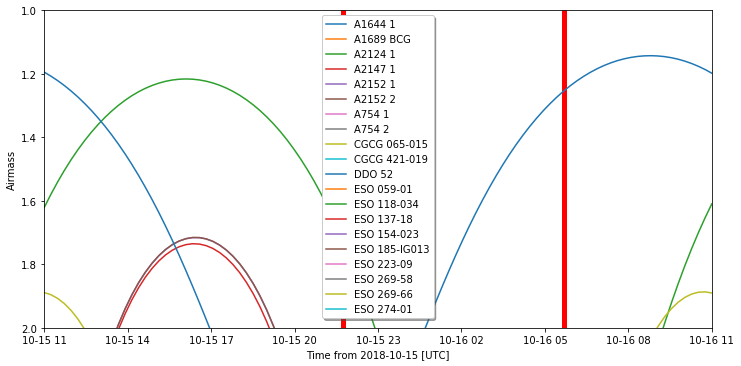

In [346]:
find_october_observe("15")

 target name  ever observable always observable fraction of time observable
------------- --------------- ----------------- ---------------------------
      A1644 1           False             False                         0.0
    A1689 BCG           False             False                         0.0
      A2124 1            True             False              0.142857142857
      A2147 1           False             False                         0.0
      A2152 1           False             False                         0.0
      A2152 2           False             False                         0.0
       A754 1           False             False                         0.0
       A754 2           False             False                         0.0
 CGCG 065-015           False             False                         0.0
 CGCG 421-019           False             False                         0.0
       DDO 52           False             False                         0.0
   ESO 059-0

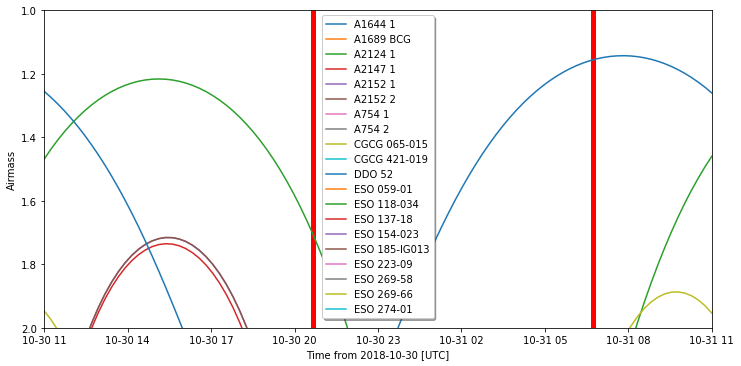

In [345]:
find_october_observe("30")

In [347]:
def find_november_observe(november_day):
    fig,ax = plt.subplots(1,1)
    fig.set_size_inches(10,5)

    fig.tight_layout()

    observe_time = Time("2018-11-" + november_day + " 23:00:00")
    
    twilight_lasilla = lasilla.twilight_evening_astronomical(Time("2018-11-" + november_day + " 12:00:00"), which='nearest')
    twilight_end_lasilla = lasilla.twilight_morning_astronomical(Time("2018-11-" + november_day + " 12:00:00"), which='next')
    
    observing_range = [twilight_lasilla, twilight_end_lasilla]
    
    # CONSTRAINTS: If object appears within range on graph, but is not observable, this means that the moon is too close to the object.
    constraints = [AirmassConstraint(2), MoonSeparationConstraint(35*u.deg)]

    small_lasilla_observing_table = observability_table(constraints, lasilla, some_globs, time_range=observing_range)
    
    print(small_lasilla_observing_table)
    
    for i, my_object in enumerate(some_globs):
        if small_lasilla_observing_table['ever observable'][i]:  # Sees true or false
            name = small_lasilla_observing_table['target name'][i]
            obj_frac = small_lasilla_observing_table['fraction of time observable'][i]
            obj_time = obj_frac * lasilla_observing_length
            output = "You can observe {0:s} for {1:.2f}".format(name, obj_time.to(u.h))
            print(output)

    print(lasilla.moon_phase(observe_time)) # 2*pi = new moon. 0 = full moon.
    # Moon brightness must be taken into consideration. However, we do not quantify its effect here, only the effect of separation distance
    
    plot_airmass(some_globs, lasilla, observe_time, max_airmass = 2)
    
    ax.vlines(twilight_lasilla.datetime, 1,3, color='r', linewidth=5)
    ax.vlines(twilight_end_lasilla.datetime, 1,3, color='r', linewidth=5)

    ax.legend(loc=0,shadow=True);

 target name  ever observable always observable fraction of time observable
------------- --------------- ----------------- ---------------------------
      A1644 1           False             False                         0.0
    A1689 BCG           False             False                         0.0
      A2124 1            True             False              0.166666666667
      A2147 1           False             False                         0.0
      A2152 1           False             False                         0.0
      A2152 2           False             False                         0.0
       A754 1           False             False                         0.0
       A754 2           False             False                         0.0
 CGCG 065-015            True             False             0.0416666666667
 CGCG 421-019           False             False                         0.0
       DDO 52            True             False                        0.75
   ESO 059-0

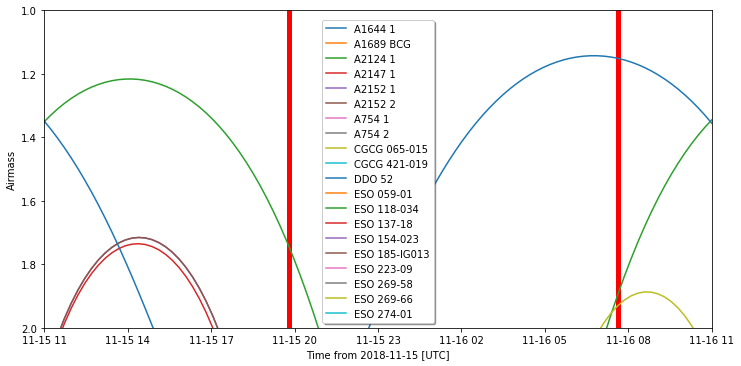

In [348]:
find_november_observe("15")

 target name  ever observable always observable fraction of time observable
------------- --------------- ----------------- ---------------------------
      A1644 1           False             False                         0.0
    A1689 BCG           False             False                         0.0
      A2124 1            True             False              0.259259259259
      A2147 1           False             False                         0.0
      A2152 1           False             False                         0.0
      A2152 2           False             False                         0.0
       A754 1           False             False                         0.0
       A754 2           False             False                         0.0
 CGCG 065-015           False             False                         0.0
 CGCG 421-019           False             False                         0.0
       DDO 52            True             False              0.814814814815
   ESO 059-0

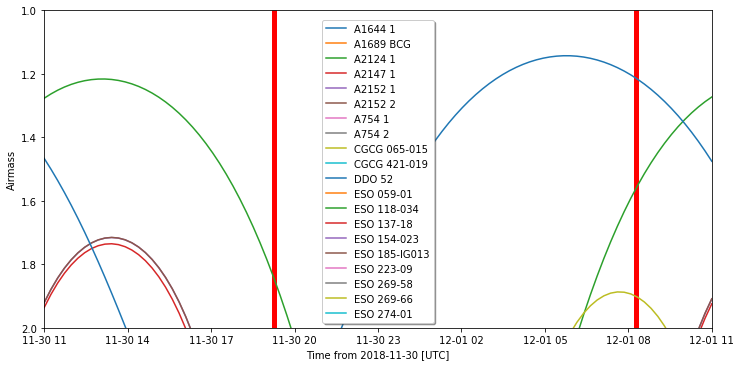

In [349]:
find_november_observe("30")